<a href="https://colab.research.google.com/github/sharna33/CSE_3210_DSP/blob/main/CSE_3210_LAB3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***LAB-3***
**Date: 15.01.2025**



In [ ]:
import numpy as np
import matplotlib.pyplot as plt

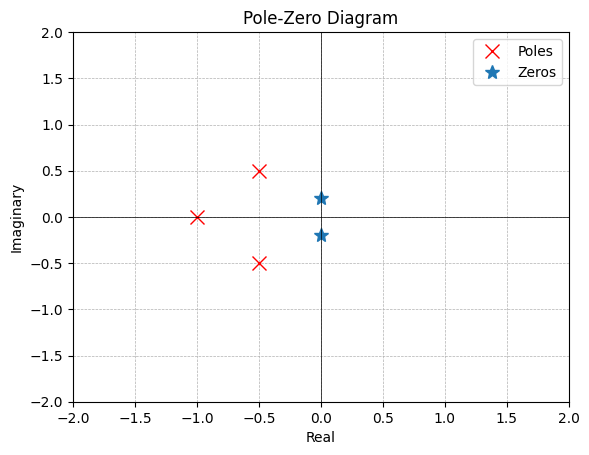

In [ ]:
def plot_pole_zero(poles, zeros):          # poles: A list of complex numbers representing poles. zeros: A list of complex numbers representing zeros.

  fig, ax = plt.subplots()     # fig: The figure (overall canvas). ax: The axes (where the actual plotting happens).

  # Plotting poles
  ax.plot(np.real(poles), np.imag(poles), 'rx', markersize=10, label='Poles')     # np.real(poles) extracts the real parts of the poles. np.imag(poles) extracts the imaginary parts of the poles.
                                                                                  # 'rx': 'r' → Red color. 'x' → Cross markers (❌) to represent poles.

  # Plotting zeros
  ax.plot(np.real(zeros), np.imag(zeros), '*', markersize=10, label='Zeros')      # '*' → Asterisk/star markers (⭐) for zeros.

  # Set plotting attributes
  ax.axhline(0, color='black', linewidth=0.5)       # axhline(0) → Draws a horizontal line at y = 0 (x-axis).
  ax.axvline(0, color='black', linewidth=0.5)       # axvline(0) → Draws a vertical line at x = 0 (y-axis).
  ax.grid(True, which='both', linestyle='--', linewidth=0.5)    # True → Grid is turned on. which='both' → Shows gridlines for both major and minor ticks.
                                                                # Dashed lines ('--') with a thin width (0.5).
  ax.legend()     # ax.legend() → Displays the legend (to differentiate poles and zeros).
  ax.set_xlabel('Real')
  ax.set_ylabel('Imaginary')
  ax.set_title('Pole-Zero Diagram')

  # Plotting  limits
  ax.set_xlim([-2, 2])
  ax.set_ylim([-2, 2])             # Limits the x-axis and y-axis to the range -2 to 2. Helps keep the plot focused on the area of interest.

  plt.show()

poles = [-0.5+0.5j, -0.5-0.5j, -1.0]
zeros  =[0.2j, -0.2j]

plot_pole_zero(poles, zeros)

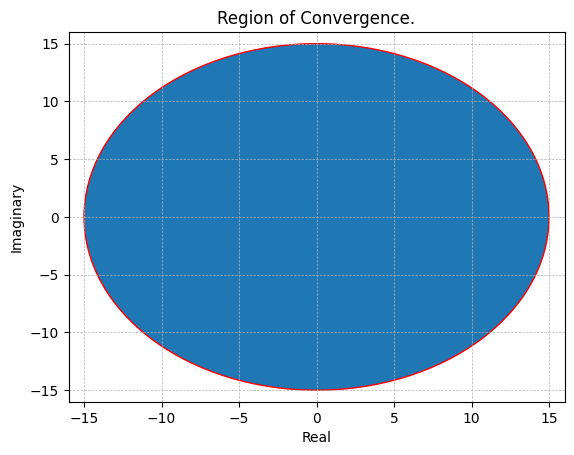

Z-Transformation values...
Z[0]: (15+0j)
Z[1]: (-2.500000000000001+3.4409548011779334j)
Z[2]: (-2.5+0.8122992405822647j)
Z[3]: (-2.499999999999999-0.8122992405822673j)
Z[4]: (-2.4999999999999956-3.440954801177935j)
ROC: |Z| < 15.0


In [ ]:

def Z_Transformation(signal, n):
  N = len(signal)
  Z  = np.zeros(N, dtype=complex)

  for k in range(N):
    Z[k]= np.sum(signal * np.exp(-1j*2*np.pi*n*k/N))

  roc  ='Entire Z-Plane'
  if np.abs(Z).any():
    roc  = 'ROC: |Z| < {}'.format(np.max(np.abs(Z)))

  return Z, roc


signal = [1,2,3,4,5]
n = np.arange(len(signal))

Z, roc = Z_Transformation(signal,n)

#Plotting ROC.
fig, ax  = plt.subplots()
circle = plt.Circle((0,0), radius=np.max(np.abs(Z)), edgecolor='r')
ax.add_patch(circle)
plt.xlim(-np.max(np.abs(Z))-1, np.max(np.abs(Z))+1 )
plt.ylim(-np.max(np.abs(Z))-1, np.max(np.abs(Z))+1 )

plt.xlabel('Real')
plt.ylabel('Imaginary')
plt.title('Region of Convergence.')
plt.grid(True, linestyle='--', linewidth=0.5)
plt.show()


print('Z-Transformation values...')
for i, z in enumerate(Z):
  print('Z[{}]: {}'.format(i,z))

print(roc)